#KNN_Assignment Zoo

In [ ]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Zoo = read_csv("/content/Zoo.csv")
Zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [ ]:
Zoo.shape

(101, 18)

In [ ]:
Zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [ ]:
Zoo.info

<bound method DataFrame.info of     animal name  hair  feathers  eggs  ...  tail  domestic  catsize  type
0      aardvark     1         0     0  ...     0         0        1     1
1      antelope     1         0     0  ...     1         0        1     1
2          bass     0         0     1  ...     1         0        0     4
3          bear     1         0     0  ...     0         0        1     1
4          boar     1         0     0  ...     1         0        1     1
..          ...   ...       ...   ...  ...   ...       ...      ...   ...
96      wallaby     1         0     0  ...     1         0        1     1
97         wasp     1         0     1  ...     0         0        0     6
98         wolf     1         0     0  ...     1         0        1     1
99         worm     0         0     1  ...     0         0        0     7
100        wren     0         1     1  ...     1         0        0     2

[101 rows x 18 columns]>

In [ ]:
Zoo.describe

<bound method NDFrame.describe of     animal name  hair  feathers  eggs  ...  tail  domestic  catsize  type
0      aardvark     1         0     0  ...     0         0        1     1
1      antelope     1         0     0  ...     1         0        1     1
2          bass     0         0     1  ...     1         0        0     4
3          bear     1         0     0  ...     0         0        1     1
4          boar     1         0     0  ...     1         0        1     1
..          ...   ...       ...   ...  ...   ...       ...      ...   ...
96      wallaby     1         0     0  ...     1         0        1     1
97         wasp     1         0     1  ...     0         0        0     6
98         wolf     1         0     0  ...     1         0        1     1
99         worm     0         0     1  ...     0         0        0     7
100        wren     0         1     1  ...     1         0        0     2

[101 rows x 18 columns]>

In [ ]:
## Preprocessing
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
Zoo["animal name"] = label_encoder.fit_transform(Zoo["animal name"])

In [ ]:
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
array = Zoo.values
X = array[:, 1:17]
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [ ]:
Y = array[:, -1]
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [ ]:
kfold = KFold(n_splits=4)

In [ ]:
model = KNeighborsClassifier(n_neighbors=13)
results = cross_val_score(model, X, Y, cv=kfold)

In [ ]:
print(results.mean())

0.751923076923077


In [ ]:
 # Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors1 = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors1)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)

0.97


In [ ]:
print(grid.best_params_)

{'n_neighbors': 1}


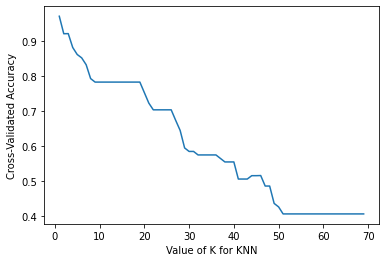

In [ ]:
 ## Visualizing the CV results
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
# choose k between 1 to 70
k_range = range(1, 70)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()